Посмотреть на группу 150100 хорошо предсказываемых пар, а именно на распределение по эпитопам, вгенам и cd4-8.

Разбивать на кластеры еще и по кластерам в-генов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
import networkx as nx

%matplotlib inline

Пример двух мотивов с хорошим спариванием

In [2]:
data_pd = pd.read_csv('data/MergedData.csv', index_col=0)

In [ ]:
def SeqMaskInd(sequences, mask):
    ind = np.zeros((sequences.shape[0]), dtype=bool)
    for i in range(sequences.shape[0]):
        if len(sequences[i]) == len(mask):
            ind[i] = True
            for j in range(len(mask)):
                if mask[j] != '?' and mask[j] != sequences[i][j]:
                    ind[i] = False
    return ind

In [4]:
aind = SeqMaskInd(data_pd['alpha.cdr3'], 'CAV??NYAQGLTF')
bind = SeqMaskInd(data_pd['beta.cdr3'], 'CA????SAETLYF')

In [11]:
np.sum(aind), np.sum(bind), np.sum(aind&bind)

(286, 270, 155)

In [12]:
data_pd.loc[np.where(aind&bind)[0]]

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
829,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVGHNYAQGLTF,TRBV19*01,NaN,TRBJ2-3*01,CASSIDSAETLYF
2262,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,"TRAV3N-3*01,TRAV3-3*01",TRAJ26*01,CAVSYNYAQGLTF,"TRBV14*01,TRBV13-1*02",NaN,TRBJ2-3*01,CASSGDSAETLYF
3596,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSVNYAQGLTF,TRBV4*01,NaN,TRBJ2-3*01,CASSADSAETLYF
5104,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSHNYAQGLTF,TRBV4*01,NaN,TRBJ2-3*01,CASSSDSAETLYF
7755,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSENYAQGLTF,TRBV4*01,NaN,TRBJ2-3*01,CASSSDSAETLYF
7914,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSANYAQGLTF,TRBV13-2*01,NaN,TRBJ2-3*01,CASGGESAETLYF
10196,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSNNYAQGLTF,TRBV4*01,NaN,TRBJ2-3*01,CASSSDSAETLYF
10761,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSSNYAQGLTF,TRBV15*01,NaN,TRBJ2-3*01,CASSLDSAETLYF
10779,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,TRAV3N-3*01,TRAJ26*01,CAVSNNYAQGLTF,"TRBV17*01,TRBV13-1*02",NaN,TRBJ2-3*01,CASSGDSAETLYF
12307,vdjdb,MusMusculus,NaN,SSYRRPVGI,PB1,BAL,CD8+,"TRAV3N-3*01,TRAV3-3*01",TRAJ26*01,CAVSGNYAQGLTF,"TRBV4*01,TRBV5*01,TRBV15*01,TRBV17*01",NaN,TRBJ2-3*01,CASSSDSAETLYF


In [10]:
epi = data_pd.loc[np.where(aind&bind)[0]]['epitope']
epic = {e:0 for e in set(epi)}
for e in epi:
    epic[e] += 1
epic

{'ASNENMETM': 1,
 'ASNENMETM,SSYRRPVGI': 1,
 'SSLENFRAYV': 9,
 'SSLENFRAYV,ASNENMETM,SSYRRPVGI': 1,
 'SSLENFRAYV,SSYRRPVGI': 7,
 'SSYRRPVGI': 136}

In [95]:
data_pd = pd.read_csv('data/MergedData.csv', index_col=0)

In [97]:
data_pd = data_pd.loc[data_pd['species'] == 'HomoSapiens']

In [24]:
set(data_pd['species'])

{'HomoSapiens'}

In [103]:
set([4,6]) | set([2,3,6])

{2, 3, 4, 6}

In [111]:
epi = d['epitope']
epic = {e:0 for e in set(epi)}
for e in epi:
    epic[e] += 1
epic

{nan: 46}

In [112]:
d = data_pd.loc[pind]
d

,database,species,sample,epitope,antigen,tissue,cell_subset,alpha.v,alpha.j,alpha.cdr3,beta.v,beta.d,beta.j,beta.cdr3
94592,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV23DV6,TRAJ35,CAASISFGNVLHC,"TRBV7-3,TRBV7-4",NaN,TRBJ1-1,CASSLTAFTEAFF
170497,tcr_ab_pairs,HomoSapiens,5,NaN,NaN,NaN,NaN,"TRAV8-4,TRAV8-2",TRAJ54,CAVRLVQGAQKLVF,"TRBV4-2,TRBV4-3","TRBD2,TRBD1",TRBJ2-1,CASSQVSGTYPYNEQFF
123779,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV9-2,TRAJ15,CALSTRQAGTALIF,TRBV7-8,TRBD1,TRBJ2-3,CATRGGRSIDTQYF
66564,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-2,TRAJ26,CAEGFYGQNFVF,TRBV10-3,TRBD2,TRBJ2-5,CAISAASGGGQETQYF
135690,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ54,CAAGARQGAQKLVF,"TRBV7-2,TRBV7-8",NaN,TRBJ2-1,CASSLGGSDNEQFF
50187,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV29DV5,TRAJ40,CAAPDRSGTYKYIF,"TRBV6-6,TRBV6-5",NaN,TRBJ2-7,CASSYSSPYEQYF
38925,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV13-1,TRAJ44,CAARPGTASKLTF,TRBV7-9,TRBD1,TRBJ2-7,CASSLGPRVNEQYF
27664,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV21,TRAJ34,CAASPYNTDKLIF,"TRBV7-6,TRBV7-7",NaN,TRBJ1-3,CASSWEGNTIYF
81425,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,"TRAV8-4,TRAV8-2",TRAJ16,CAVSEGEGQKLLF,TRBV20-1,TRBD2,TRBJ2-1,CSASVGGNEQFF
21779,tcr_ab_pairs,HomoSapiens,3,NaN,NaN,NaN,NaN,TRAV10,TRAJ48,CVVKGDFGNEKLTF,TRBV15,TRBD1,TRBJ2-7,CATSREPDRNYEQYF


In [114]:
data_pd.shape[0]

171775

In [17]:
auseless_positions = {7: [6],
 8: [2],
 9: [1],
 10: [4, 9],
 11: [2, 4, 10],
 12: [2, 11],
 13: [4],
 14: [4, 13],
 15: [4],
 16: [4, 5, 15],
 17: [4, 6, 16],
 18: [5, 6, 17],
 19: [4]}

buseless_positions = {7: [],
 8: [],
 9: [2],
 10: [4, 9],
 11: [4, 6],
 12: [4, 11],
 13: [4],
 14: [4, 5, 6, 13],
 15: [4, 14],
 16: [4, 15],
 17: [4, 16],
 18: [7, 8, 11, 17],
 19: []}

In [115]:
acdr3 = data_pd['alpha.cdr3'].as_matrix()
bcdr3 = data_pd['beta.cdr3'].as_matrix()

In [116]:
acdr3_length = np.array([len(x) for x in acdr3])
bcdr3_length = np.array([len(x) for x in bcdr3])

In [ ]:
acdr3f = np.zeros((acdr3.shape[0]), dtype=object)
for i in range(acdr3.shape[0]):
    arr = np.array(list(acdr3[i]))
    if len(arr) in auseless_positions.keys():
        arr[auseless_positions[len(arr)]] = 'X'
    acdr3f[i] = ''.join(arr)
    
bcdr3f = np.zeros((bcdr3.shape[0]), dtype=object)
for i in range(bcdr3.shape[0]):
    arr = np.array(list(bcdr3[i]))
    if len(arr) in buseless_positions.keys():
        arr[buseless_positions[len(arr)]] = 'X'
    bcdr3f[i] = ''.join(arr)

In [28]:
def aapClusters1(sequences, indexing, mmm=1, delimeter='*'):
    l = len(sequences[0])
    masks = itertools.combinations(np.arange(l), mmm)
    clusters = {}
    for mask1 in masks:
        mask = [-1] + list(mask1) + [l]
        clusters[mask1] = []
        masker = lambda x: delimeter.join([x[mask[i] + 1:mask[i + 1]] for i in range(mmm + 1)])
        factor = set([masker(x) for x in sequences])
        c = {m:[] for m in factor}
        for i, x in enumerate(sequences):
            c[masker(x)].append(indexing[i])
        for m in factor:
            if len(c[m]) > 1:
                clusters[mask1].append(c[m])
    return clusters

def aapClusters(sequences, indexing, mmm=1, delimeter='*'):
    l = len(sequences[0])
    clusters = []
    masks = itertools.combinations(np.arange(l), mmm)
    for mask in masks:
        mask = [-1] + list(mask) + [l]
        masker = lambda x: delimeter.join([x[mask[i] + 1:mask[i + 1]] for i in range(mmm + 1)])
        factor = set([masker(x) for x in sequences])
        c = {m:[] for m in factor}
        for i, x in enumerate(sequences):
            c[masker(x)].append(indexing[i])
        for m in factor:
            if len(c[m]) > 1:
                clusters.append(c[m])
    return clusters

In [29]:
def EdgeListfromClusters(n, clusters):
    edges = set([])
    for cluster in clusters:
        for x, y in itertools.combinations(cluster, 2):
            edges.add((x, y))
    return list(edges)

In [117]:
aedges = []
for l in range(6, 20):
    indexes = np.arange(acdr3.shape[0])[acdr3_length == l]
    a = acdr3[indexes]
    clusters = aapClusters1(a, indexes)
    aedges.append(clusters)

bedges = []
for l in range(6, 20):
    indexes = np.arange(bcdr3.shape[0])[bcdr3_length == l]
    b = bcdr3[indexes]
    clusters = aapClusters1(b, indexes)
    bedges.append(clusters)

KeyboardInterrupt: 

In [ ]:
aedges = []
for l in range(6, 20):
    indexes = np.arange(acdr3f.shape[0])[acdr3_length == l]
    a = acdr3f[indexes]
    clusters = aapClusters1(a, indexes)
    aedges.append(clusters)

bedges = []
for l in range(6, 20):
    indexes = np.arange(bcdr3f.shape[0])[bcdr3_length == l]
    b = bcdr3f[indexes]
    clusters = aapClusters1(b, indexes)
    bedges.append(clusters)

In [37]:
s = 0
for i in bedges:
    for j in i:
        s += len(i[j]) ** 2
s

787327302

In [38]:
a_edge_pos = {}
for l in range(len(aedges)):
    for w in range(len(aedges[l])):
        for cluster in aedges[l][(w,)]:
            for i, j in itertools.combinations(cluster, 2):
                a_edge_pos[(i, j)] = (l, w)
                
b_edge_pos = {}
for l in range(len(bedges)):
    for w in range(len(aedges[l])):
        for cluster in bedges[l][(w,)]:
            for i, j in itertools.combinations(cluster, 2):
                b_edge_pos[(i, j)] = (l, w)

In [39]:
a_edges_set = set(a_edge_pos.keys())
b_edges_set = set(b_edge_pos.keys())

In [40]:
common_edges = a_edges_set & b_edges_set

In [41]:
len(common_edges), len(a_edge_pos), len(b_edge_pos)

(1695, 757975, 247826)

In [42]:
s = 0
for i in range(6, 20):
    s += np.sum(acdr3_length == i) ** 2
s

4773398545

In [43]:
s * len(common_edges) / (len(a_edge_pos) * len(b_edge_pos))

43.072060672258758

In [44]:
ab = np.zeros((20, 20, 20, 20), dtype=int)
for i, j in common_edges:
    a, b = a_edge_pos[(i, j)]
    c, d = b_edge_pos[(i, j)]
    ab[a,b,c,d] += 1

In [45]:
aedgepos = np.zeros((20, 20), dtype=int)
for i, j in a_edge_pos.keys():
    l, w = a_edge_pos[(i, j)]
    aedgepos[l, w] += 1
    
bedgepos = np.zeros((20, 20), dtype=int)
for i, j in b_edge_pos.keys():
    l, w = b_edge_pos[(i, j)]
    bedgepos[l, w] += 1

In [46]:
apx = np.sum(ab, axis=(2, 3))
bpx = np.sum(ab, axis=(0, 1))

In [47]:
auseless_positions = {i:[] for i in range(7, 20)}
for i, j in np.array(np.where(apx > .5 * np.max(apx, axis=1).reshape(-1, 1))).T:
    auseless_positions[i + 6].append(j)
auseless_positions

{7: [6],
 8: [2],
 9: [1],
 10: [4, 9],
 11: [2, 4, 10],
 12: [2, 11],
 13: [4, 12],
 14: [4, 13],
 15: [4],
 16: [4, 5, 15],
 17: [4, 5, 16],
 18: [5, 6, 17],
 19: [4]}

In [48]:
buseless_positions = {i:[] for i in range(7, 20)}
for i, j in np.array(np.where(bpx > .5 * np.max(bpx, axis=1).reshape(-1, 1))).T:
    buseless_positions[i + 6].append(j)
buseless_positions

{7: [],
 8: [],
 9: [2],
 10: [4],
 11: [4, 10],
 12: [4, 11],
 13: [4, 12],
 14: [4, 13],
 15: [4, 14],
 16: [4, 15],
 17: [4],
 18: [7, 8, 11, 17],
 19: []}

In [103]:
# pd.DataFrame(np.dot(aedgepos[7, :].reshape(-1, 1), bedgepos[7, :].reshape(1, -1)))
# pd.DataFrame(ab[7, :, 7, :])

In [148]:
acdr3f = np.zeros((acdr3.shape[0]), dtype=object)
for i in range(acdr3.shape[0]):
    arr = np.array(list(acdr3[i]))
    if len(arr) in auseless_positions.keys():
        arr[auseless_positions[len(arr)]] = 'X'
    acdr3f[i] = ''.join(arr)
    
bcdr3f = np.zeros((bcdr3.shape[0]), dtype=object)
for i in range(bcdr3.shape[0]):
    arr = np.array(list(bcdr3[i]))
    if len(arr) in buseless_positions.keys():
        arr[buseless_positions[len(arr)]] = 'X'
    bcdr3f[i] = ''.join(arr)

In [57]:
bcdr3f

NameError: name 'bcdr3f' is not defined

In [56]:
acdr3f

NameError: name 'acdr3f' is not defined

In [118]:
aedges = []
for l in range(6, 20):
    indexes = np.arange(acdr3.shape[0])[acdr3_length == l]
    a = acdr3[indexes]
    clusters = aapClusters(a, indexes)
    e = EdgeListfromClusters(acdr3.shape[0], clusters)
    aedges += e

bedges = []
for l in range(6, 20):
    indexes = np.arange(bcdr3.shape[0])[bcdr3_length == l]
    b = bcdr3[indexes]
    clusters = aapClusters(b, indexes)
    e = EdgeListfromClusters(bcdr3.shape[0], clusters)
    bedges += e

In [58]:
a_adj = [[] for i in range(acdr3.shape[0])]
b_adj = [[] for i in range(bcdr3.shape[0])]

for i, j in aedges:
    a_adj[i].append(j)
    a_adj[j].append(i)

for i, j in bedges:
    b_adj[i].append(j)
    b_adj[j].append(i)

In [ ]:
def Clustering(n, edges):
    

<Container object of 130 artists>

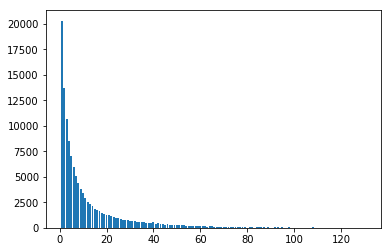

In [59]:
degrees = np.array([len(x) for x in a_adj])
degrees_distr = np.zeros((np.max(degrees) + 1))
for d in degrees:
    degrees_distr[d] += 1
plt.bar(np.arange(1, degrees_distr.shape[0]), degrees_distr[1:])

(0, 6000)

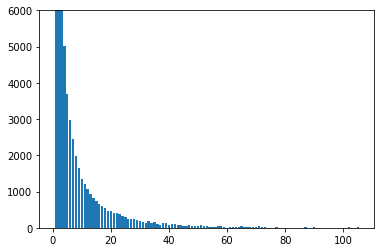

In [62]:
degrees = np.array([len(x) for x in b_adj])
degrees_distr = np.zeros((np.max(degrees) + 1))
for d in degrees:
    degrees_distr[d] += 1
plt.bar(np.arange(1, degrees_distr.shape[0]), degrees_distr[1:])
plt.ylim((0, 6000))

In [63]:
ab_deg_distr = np.zeros((12, 22), dtype=int)
for i in range(acdr3.shape[0]):
    ab_deg_distr[int(np.log2(1 + len(a_adj[i]))), 
                 int(np.log2(1 + len(b_adj[i])))] += 1

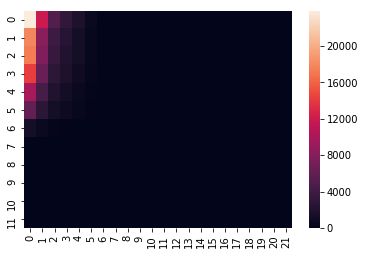

In [64]:
sns.heatmap(ab_deg_distr)

In [65]:
ax = np.sum(ab_deg_distr, axis=1)
bx = np.sum(ab_deg_distr, axis=0)
abx = np.dot(ax.reshape(-1, 1), bx.reshape(1, -1)) / np.sum(ax)
abx.shape

(12, 22)

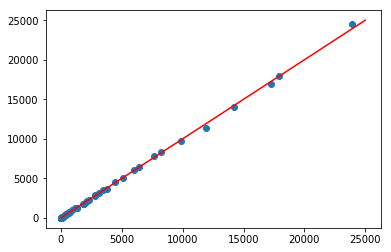

In [67]:
plt.scatter(ab_deg_distr, abx)
plt.plot([0, 25000], [0, 25000], color='red')

То есть распределения степеней у спаренных последовательностей достаточно сильна похожа на случайную.

In [68]:
comp_len = np.array([len(x) for x in acomponents])
comp_len = comp_len[comp_len > 2]
sns.distplot(comp_len)

NameError: name 'acomponents' is not defined

In [236]:
np.sum(comp_len > 100)

213

In [52]:
aedges[0]

{(0,): [[22091, 171019],
  [24242, 56999],
  [87325, 94947],
  [81824, 93296],
  [44359, 117034, 123541]],
 (1,): [[94947, 158780], [154565, 158012], [22091, 71600, 108120, 171019]],
 (2,): [[6720, 22091, 49133, 171019], [94947, 96527], [8282, 96820]],
 (3,): [[22091, 171019]],
 (4,): [[22091, 171019], [49133, 96820, 110040, 124432]],
 (5,): [[22091, 171019]]}

In [119]:
Agraph = nx.Graph()
Agraph.add_edges_from(aedges)
acomponents = list(nx.connected_components(Agraph))

Bgraph = nx.Graph()
Bgraph.add_edges_from(bedges)
bcomponents = list(nx.connected_components(Bgraph))

In [120]:
alength = np.array([len(x) for x in acomponents])
acomp = np.array(acomponents)[alength > 100]

blength = np.array([len(x) for x in bcomponents])
bcomp = np.array(bcomponents)[blength > 100]

In [121]:
i2acomp = {}
for i, x in enumerate(acomp):
    for y in x:
        i2acomp[y] = i
i2bcomp = {}
for i, x in enumerate(bcomp):
    for y in x:
        i2bcomp[y] = i

In [122]:
avertexes = set(i2acomp.keys())
bvertexes = set(i2bcomp.keys())
indexes = avertexes & bvertexes
len(indexes)

29390

In [123]:
vacomp = np.array([indexes & acomp[i] for i in range(acomp.shape[0])])
vbcomp = np.array([indexes & bcomp[i] for i in range(bcomp.shape[0])])

In [124]:
comp_table = np.zeros((len(acomp), len(bcomp)), dtype=int)
for i in indexes:
    comp_table[i2acomp[i], i2bcomp[i]] += 1

In [125]:
xcompsum, ycompsum = np.sum(comp_table, axis=1), np.sum(comp_table, axis=0)
expected = np.dot(xcompsum.reshape(-1, 1), ycompsum.reshape(1, -1)) / np.sum(comp_table)
expected.shape

(197, 33)

In [126]:
zscores = (comp_table - expected) / np.sqrt(expected + 1)

In [127]:
zscore5 = np.array(np.where(zscores > 5)).T
zscore5

array([[ 24,  10],
       [115,  12],
       [149,   4],
       [168,   7]])

In [78]:
for i, j in zscore5:
    print(zscores[i, j])

6.53865835993
6.05445261421
5.38967157101
5.65815187718


In [188]:
bunpind = set(bind)
for i in pind:
    bunpind.remove(i)
bunpind = np.array(list(bunpind))
len(bunpind)

15106

### Exploring the pair of clusters with max zscore

In [79]:
# a_cluster, b_cluster = 69, 10
#a_cluster, b_cluster = 34, 10
a_cluster, b_cluster = 24, 10

aind = np.array(list(vacomp[a_cluster]))
bind = np.array(list(vbcomp[b_cluster]))
print('alpha chain={}\n'.format(aind.shape[0]), 
      'beta chain={}\n'.format(bind.shape[0]), 
      'Paired={}\n'.format(len(acomp[a_cluster] & bcomp[b_cluster])))

alpha chain=93
 beta chain=5598
 Paired=46



In [82]:
acdr3.shape[0]

171775

In [87]:
pind = np.array(list(vacomp[a_cluster] & vbcomp[b_cluster]))

a_length, b_length = len(acdr3[pind[0]]), len(bcdr3[pind[0]])
all_a_pmm = PPM(acdr3[acdr3_length == a_length])
all_b_pmm = PPM(bcdr3[bcdr3_length == b_length])
a_pmm = PPM(acdr3[pind])
b_pmm = PPM(bcdr3[pind])

# amotif, bmotif = 'CAV??NYAQGLTF', 'CA????SAETLYF'
wa_ppm = (1 + a_pmm)# / (1 + all_a_pmm)
wa_ppm = wa_ppm / np.sum(wa_ppm, axis=1).reshape(-1, 1)
amotif = np.array([aa[x] for x in np.argmax(wa_ppm, axis=1)])
amotif[np.max(wa_ppm, axis=1) < 0.6] = '?'
amotif = ''.join(amotif)

wb_pmm = (1 + b_pmm)# / (1 + all_b_pmm)
wb_pmm = wb_pmm / np.sum(wb_pmm, axis=1).reshape(-1, 1)
bmotif = np.array([aa[x] for x in np.argmax(wb_pmm, axis=1)])
bmotif[np.max(wb_pmm, axis=1) < 0.6] = '?'
bmotif = ''.join(bmotif)

print(amotif, bmotif)

CA??GSQGNLIF CASS?????EQ?F


In [90]:
bmatchmask = np.array([MatchMask(b, bmotif) < 1 for b in bcdr3])
amatchmask = np.array([MatchMask(a, amotif) < 1 for a in acdr3])

array([False, False, False, ..., False, False, False], dtype=bool)

In [93]:
np.sum(amatchmask), np.sum(bmatchmask), np.sum(amatchmask&bmatchmask)

(180, 4768, 34)

In [ ]:
acdr3.shape[0] * np.sum(amatchmask&bmatchmask) / np.sum(amatchmask) * np.sum(bmatchmask)

In [61]:
#long_amotif = 'CAV???NYAQGLTF'
#long_amatchmask = np.array([MatchMask(a, long_amotif) == 0 for a in acdr3])

In [169]:
x = bcdr3[~bmatchmask & amatchmask]
sorted(x)

['CAASTANYGYTF',
 'CACRLALYNEQFF',
 'CAISDILPGSGNTIYF',
 'CAISESSQGAGAKNIQYF',
 'CAPLKGSSYEQYF',
 'CASAENGNTIYF',
 'CASARAGGWGDNEQFF',
 'CASIIRSSYEQYF',
 'CASKKTQGRNEQFF',
 'CASKPTLGGEQFF',
 'CASMVGQGTGELFF',
 'CASNDRSNQPQHF',
 'CASRAAGARGYTF',
 'CASRGTLDQPQHF',
 'CASRITGARGQETQYF',
 'CASRKGQGANEQYF',
 'CASRQGQNTGELFF',
 'CASSARGILTDTQYF',
 'CASSDQFGDYGYTF',
 'CASSDSRSGIGETQYF',
 'CASSDSRTPFQRPLFEAFF',
 'CASSEGSNQPQHF',
 'CASSEKVVTGVYGYTF',
 'CASSEPSTGANVLTF',
 'CASSETGGVVIETQYF',
 'CASSFDVINNEQFF',
 'CASSFGTFETQYF',
 'CASSFPSPQAVSPVGTEAFF',
 'CASSFSGTGGVGGGGEQFF',
 'CASSFTREQYF',
 'CASSGGGTGDYNEQFF',
 'CASSGRLAGGLNEQYF',
 'CASSGRQGRETQYF',
 'CASSIASGFYNEQFF',
 'CASSIGEYQRGDNEQFF',
 'CASSIGTFETQYF',
 'CASSIGVYGYTF',
 'CASSINGGRENEQFF',
 'CASSINGWTEAFF',
 'CASSIRAAETQYF',
 'CASSIRAAETQYF',
 'CASSKALGRAGSPLHF',
 'CASSLAANTEAFF',
 'CASSLALTGGETKNIQYF',
 'CASSLARQGANYGYTF',
 'CASSLARSGETQYF',
 'CASSLASGYTDTQYF',
 'CASSLAYSPGFSSYEQYF',
 'CASSLEASQTFTDTQYF',
 'CASSLEGKSSYEQYF',
 'CASSLFGGSGT

In [170]:
x = acdr3[bmatchmask & ~amatchmask]
sorted(x)

['CAAADQGGSEKLVF',
 'CAAAFRSNDYKLSF',
 'CAAAGRGSTLGRLYF',
 'CAAAHTGANSKLTF',
 'CAAAHTGANSKLTF',
 'CAAANSGTYQRF',
 'CAAANSGTYQRF',
 'CAAAPNTGNQFYF',
 'CAAARGTASKLTF',
 'CAAARSNDYKLSF',
 'CAAARYKYIF',
 'CAAASFGNVLHC',
 'CAAASGGQNFVF',
 'CAAASGTYKYIF',
 'CAAASGYSTLTF',
 'CAAATGANSKLTF',
 'CAAATGNQFYF',
 'CAAAYWGGKLIF',
 'CAACMGAGGTSYGKLTF',
 'CAADEGQNFVF',
 'CAADIHNTDKLIF',
 'CAADIKAAGNKLTF',
 'CAADPGAAGNKLTF',
 'CAADPNRAGTALIF',
 'CAADQAGTALIF',
 'CAADQDSNYQLIW',
 'CAADSGGGADGLTF',
 'CAADSGGSYIPTF',
 'CAADSGTYKYIF',
 'CAADTGNQFYF',
 'CAADTGNYKYVF',
 'CAAEAAGGNNKLTF',
 'CAAEDSGGSNYKLTF',
 'CAAEGGKLIF',
 'CAAEGNMLTF',
 'CAAEGTASLGKLQF',
 'CAAEGYSTLTF',
 'CAAELDAGGTSYGKLTF',
 'CAAENNNDMRF',
 'CAAEPSNMGYKLTF',
 'CAAERSTLTF',
 'CAAESGGGADGLTF',
 'CAAESYNTDKLIF',
 'CAAEWGISNFGNEKLTF',
 'CAAFDSWGKLQF',
 'CAAFHSGTYKYIF',
 'CAAFHSGTYKYIF',
 'CAAFLGSARQLTF',
 'CAAFSGTYKYIF',
 'CAAFSPSGGSYIPTF',
 'CAAGAGNQFYF',
 'CAAGAGSYQLTF',
 'CAAGANFGNEKLTF',
 'CAAGASGGSYIPTF',
 'CAAGASGSRLTF',
 'CAAGEDTDKLIF',

In [69]:
for i in range(a_pmm.shape[0]):
    print(aa[np.argmax(a_pmm[i, :])], np.max(a_pmm[i, :]))

C 46
A 43
G 18
G 26
G 46
S 46
Q 46
G 46
N 46
L 46
I 46
F 46


In [70]:
for i in range(b_pmm.shape[0]):
    print(aa[np.argmax(b_pmm[i, :])], np.max(b_pmm[i, :]))

C 46
A 46
S 46
S 45
I 20
R 36
S 33
S 27
Y 33
E 39
Q 42
Y 38
F 46


In [ ]:
def GetPairSampling(A, B):
    assert A.shape[0] % 2 == 0
    X = np.zeros((2 * A.shape[0], A.shape[1] + B.shape[1]))
    X[::2, :A.shape[1]] = A
    X[1::2, :A.shape[1]] = A
    X[::2, A.shape[1]:] = B
    X[1::4, A.shape[1]:] = B[1::2]
    X[3::4, A.shape[1]:] = B[::2]
    
    y = np.zeros((2 * A.shape[0]))
    y[::2] = 1
    
    return X, y

In [86]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '_']
aa2num_table = {aa[i]:i for i in range(21)}

def aa2num(aa):
    return aa2num_table[aa]

def protein2array(protein):
    return np.array([aa2num(aa) for aa in protein])

def array2protein(array):
    return ''.join([aa[x] for x in array])

## Is pairing inside pind less random?

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)

A = np.array([protein2array(x) for x in acdr3[pind]]).reshape((pind.shape[0], len(acdr3[pind[0]])))
B = np.array([protein2array(x) for x in bcdr3[pind]]).reshape((pind.shape[0], len(bcdr3[pind[0]])))
train_index, test_index = train_test_split(np.arange(pind.shape[0] - 1))

X_train, y_train = GetPairSampling(A[train_index], B[train_index])
X_test, y_test = GetPairSampling(A[test_index], B[test_index])

In [75]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [76]:
np.mean(y_pred == y_test)

0.51315789473684215

### No

## Logo

In [84]:
def PPM(sequences):
    l = len(sequences[0])
    ppm = np.zeros((l, 20), dtype=int)
    for seq in sequences:
        if len(seq) != l:
            print('\nSequences have different lengths\n')
            return
        for i in range(l):
            ppm[i, aa2num(seq[i])] += 1
    return ppm

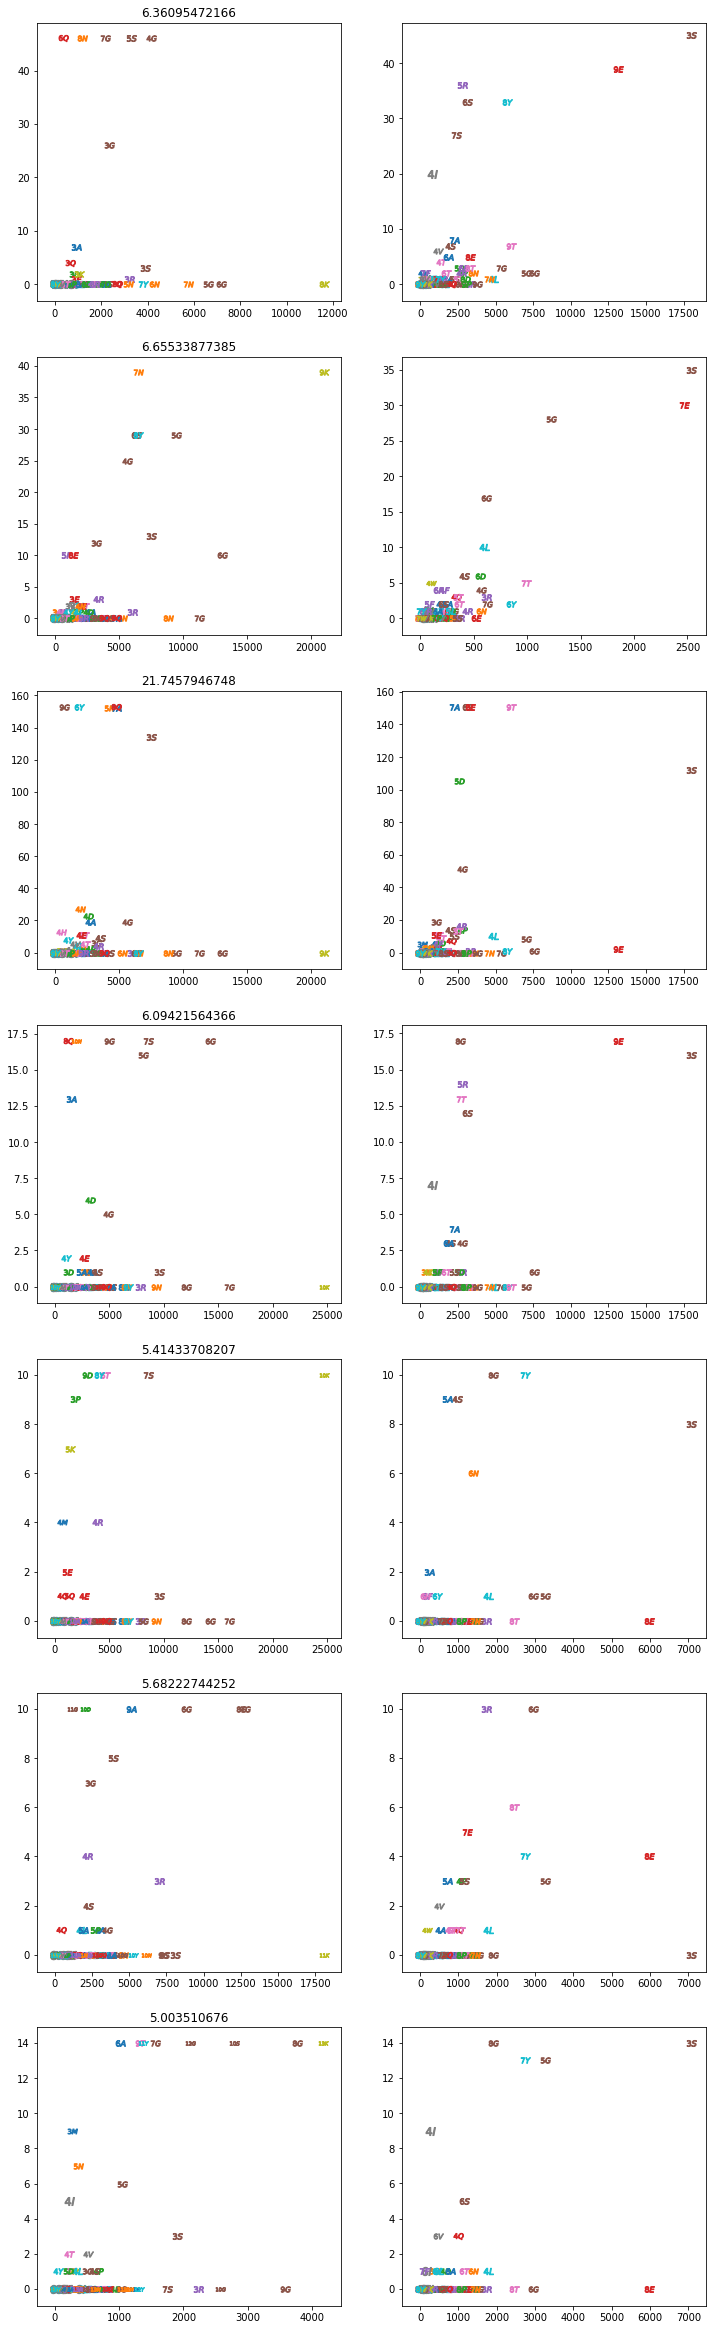

In [39]:
ax = plt.figure(figsize=(12, 6 * zscore5.shape[0])).subplots(nrows=zscore5.shape[0], ncols=2)
for x in range(zscore5.shape[0]):
    a_cluster, b_cluster = zscore5[x]
    aind = np.array(list(vacomp[a_cluster]))
    bind = np.array(list(vbcomp[b_cluster]))
    #print('alpha chain={}\n'.format(aind.shape[0]), 
    #      'beta chain={}\n'.format(bind.shape[0]), 
    #      'Paired={}\n'.format(len(acomp[a_cluster] & bcomp[b_cluster])))

    pind = np.array(list(vacomp[a_cluster] & vbcomp[b_cluster]))

    a_length, b_length = len(acdr3[pind[0]]), len(bcdr3[pind[0]])
    all_a_pmm = PPM(acdr3[acdr3_length == a_length])
    all_b_pmm = PPM(bcdr3[bcdr3_length == b_length])
    a_pmm = PPM(acdr3[pind])
    b_pmm = PPM(bcdr3[pind])
    
    for i in range(3, a_length - 3):
        for j in range(20):
            ax[x, 0].scatter(all_a_pmm[i, j], 
                             a_pmm[i, j], 
                             marker='$' + str(i) + aa[j] + '$',
                             s=100)
    for i in range(3, b_length - 3):
        for j in range(20):
            ax[x, 1].scatter(all_b_pmm[i, j], 
                             b_pmm[i, j], 
                             marker='$' + str(i) + aa[j] + '$',
                             s=100)
    ax[x, 0].set_title(zscores[a_cluster, b_cluster])

In [ ]:
aind = SeqMaskInd(acdr3, 'CAV??NYAQGLTF')
bind = SeqMaskInd(bcdr3, 'CA????SAETLYF')
bind2 = SeqMaskInd(bcdr3, 'CA?????SAETLYF')
np.sum(aind), np.sum(bind), np.sum(aind & bind), np.sum(bind2), np.sum(aind & bind2)

In [37]:
def standartize_cdr3_length(protein):
    insertion_places = {6:3, 7:4, 8:4, 9:5, 10:5, 11:6, 12:6, 13:7, 14:7, 15:8}
    insertion_place = insertion_places[len(protein)]
    insertion_length = 15 - len(protein)
    return protein[:insertion_place] + '_' * insertion_length + protein[insertion_place:]

In [42]:
standartize_cdr3_length(acdr3[aind[0]])

'CAVSGNY__AQGLTF'

In [ ]:
# here mask is a l x 20 table
def MaskIndexes(sequences, mask):
    ind = np.zeros((sequences.shape[0]), dtype=bool)
    for i in range(sequences.shape[0]):
        if len(sequences[i]) == mask.shape[1]:
            ind[i] = True
            for j in range(mask.shape[1]):
                if not mask[j, aa2num[sequences[i]]]:
                    ind[i] = False
    return ind

In [ ]:
acdr3arr = np.array([protein2array(x) for x in acdr3])
bcdr3arr = np.array([protein2array(x) for x in bcdr3])

In [89]:
def MatchMask(seq, mask):
    if len(seq) != len(mask):
        return 100
    mc = 0
    for i, a in enumerate(mask):
        if a != seq[i] and a != '?':
            mc += 1
    return mc

In [ ]:
# Alpha Beta Mask Table 
# masks are l x 20 arrays
def MaskIndexesMutTable(aSeq, bSeq, amask, bmask):
    # last two columns are:
    # -2 is full match
    # -1 is mismatch
    table = np.zeros((amask.shape[1] * 20 + 2, bmask.shape[1] * 20 + 2), dtype=object)
    for x in itertools.product(range(table.shape[0]), 
                               range(table.shape[1])):
        table[x] = []
    
    for i in range(aSeq.shape[0]):
        a, b = aSeq[i], bSeq[i]
        aindex, bindex = -1, -1
        
        if len(a) == amask.shape[0]:
            amatch = np.array(amask[np.arange(len(a)), a], dtype=bool)
            if np.sum(~amatch) == 0:
                aindex = -2
            elif np.sum(~amatch) == 1:
                where = np.where(~amatch)[0][0]
                aindex = 20 * where + a[where]
        
        if len(b) == bmask.shape[0]:
            bmatch = np.array(bmask[np.arange(len(b)), b], dtype=bool)
            if np.sum(~bmatch) == 0:
                bindex = -2
            elif np.sum(~bmatch) == 1:
                where = np.where(~bmatch)[0][0]
                bindex = 20 * where + b[where]
        
        table[aindex, bindex].append(i)
    return table

In [ ]:
amotif, bmotif = 'CAV??NYAQGLTF', 'CA????SAETLYF'
amask = np.zeros((len(amotif), 20), dtype=object) 
bmask = np.zeros((len(bmotif), 20), dtype=object)
for i in range(len(amotif)):
    if amotif[i] == '?':
        amask[i, :] = 1
    else:
        amask[i, aa2num(amotif[i])] = 1

for i in range(len(bmotif)):
    if bmotif[i] == '?':
        bmask[i, :] = 1
    else:
        bmask[i, aa2num(bmotif[i])] = 1

In [ ]:
t = MaskIndexesMutTable(acdr3arr, bcdr3arr, amask, bmask)

In [ ]:
lt = np.zeros_like(t)
for i in range(t.shape[0]):
    for j in range(t.shape[1]):
        lt[i, j] = len(t[i, j])

In [188]:
asum, bsum = np.sum(lt, axis=1), np.sum(lt, axis=0)

In [189]:
expected = np.dot(asum.reshape(-1, 1), bsum.reshape(1, -1)) / np.sum(asum)
expected = np.array(expected, dtype=float)
zscores = (lt - expected) / np.sqrt(expected + 1)
zscores[-2, -2]

128.5873193006298

In [218]:
w = np.argsort(zscores.reshape(-1))

In [223]:
zscores.reshape(-1)[w[5:]]

array([-0.7062269353566748, -0.7062269353566748, -0.7061780371904275, ...,
       1.9836145844776825, 2.9754529853207763, 128.5873193006298], dtype=object)

In [242]:
x, y = np.where(np.arange(asum.shape[0]*bsum.shape[0]).reshape((asum.shape[0],bsum.shape[0]))==w[-3])
x, y = x[0], y[0]
x, y

(400, 35)

In [ ]:
data

## PWM matrix

In [ ]:
class PWM:
    def __init__(self, sequences):
        assert len(sequence) > 0
        self.l = len(sequences[0])
        PPM = np.ones((self.l, 21), dtype=float)
        for seq in sequences:
            assert len(seq) == self.l
            for pos in range(self.l):
                PPM[pos, aa2num(seq[pos])] += 1
        self.PWM = np.log2(PPM)
    
    def Score(self, seq):
        assert self.l == len(seq)
        return sum([self.PWM[pos, seq[i]] for pos in range(self.l)])

In [ ]:
pind = np.array(list(vacomp[a_cluster] & vbcomp[b_cluster]))

ldata = np.zeros(())

In [174]:
aedges = []
for l in range(6, 20):
    print(l, end=' ')
    indexes = np.arange(acdr3.shape[0])[acdr3_length == l]
    a = acdr3[indexes]
    clusters = aapClusters(a, indexes, mmm=2)
    aedges += EdgeListfromClusters(a.shape[0], clusters)

print('')
bedges = []
for l in range(6, 20):
    print(l, end=' ')
    indexes = np.arange(bcdr3.shape[0])[bcdr3_length == l]
    b = bcdr3[indexes]
    clusters = aapClusters(b, indexes, mmm=2)
    bedges += EdgeListfromClusters(b.shape[0], clusters)

6 7 8 9 10 11 12 13 14 15 16 17 18 19 
6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [179]:
a_adj_matrix = [[] for i in range(acdr3.shape[0])]
b_adj_matrix = [[] for i in range(bcdr3.shape[0])]

In [182]:
for x in aedges:
    for i, j in itertools.combinations(x, 2):
        a_adj_matrix[i].append(j)
        a_adj_matrix[j].append(i)

for x in bedges:
    for i, j in itertools.combinations(x, 2):
        b_adj_matrix[i].append(j)
        b_adj_matrix[j].append(i)

In [186]:
ae = open('a_edges.txt', 'w+')
for i, x in enumerate(a_adj_matrix):
    ae.write(str(i) + ' ' + str(x) + '\n')
ae.close()

In [188]:
ae = open('b_edges.txt', 'w+')
for i, x in enumerate(b_adj_matrix):
    ae.write(str(i) + ' ' + str(x) + '\n')
ae.close()